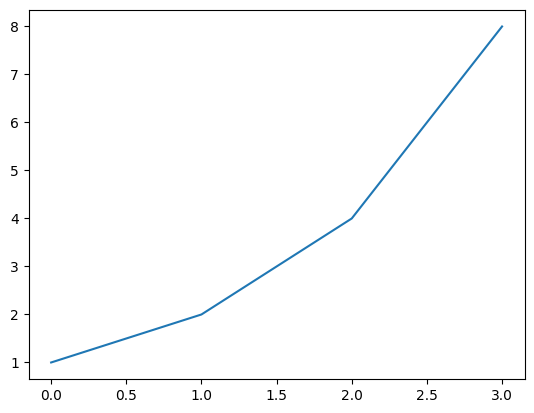

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,4,8])

In [5]:
# https://stackoverflow.com/questions/35201943/brian2-not-importing-in-anaconda-python-distribution
conda install -c http://conda.anaconda.org/brian-team brian2

Retrieving notices: ...working... done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - brian2 -> python[version='>=3.10,<3.11.0a0|>=3.10,<3.11.0a0|>=3.11,<3.12.0a0|>=3.9,<3.10.0a0|>=3.9,<3.10.0a0',build=*_cpython]

Your python: defaults/osx-arm64::python==3.9.18=hb885b13_0

If python is on the left-most side of the chain, that's the version you've

In [5]:
# !pip install brian2
# pip install brian2tools
# pip install --upgrade pip
# conda install -c conda-forge brain2tools
# pip install brian2tools

In [5]:
# https://brian.discourse.group/t/errors-with-conda-installation-of-brian2-on-a-mac-with-m1-processor/464/15
# conda install -c conda-forge sphinx
# conda install -c conda-forge docutils

In [6]:
from brian2 import *
# from brian2tools import *

In [4]:
# generate low level target language 
prefs.codegen.target = 'numpy'

The leaky integrate and fire neuron is defined by the equations:


$$\tau\frac{dV}{dt}=-V$$

LIF 모델은 뉴런이 가지고 있는 규칙
1) pre-synaptic neurons들의 spike를 종합
2) membrane potential이 threshold voltage를 넘으면 spike를 생성하고 reset voltage로 초기화
3) membrane potential voltage는 지속적으로 누수(Leak)

https://jinprelude.github.io/posts/SNN-Basic-Tutorial-5-Leaky-Integrate-and-Fire-%EB%AA%A8%EB%8D%B8-%EC%84%A4%EB%AA%85/

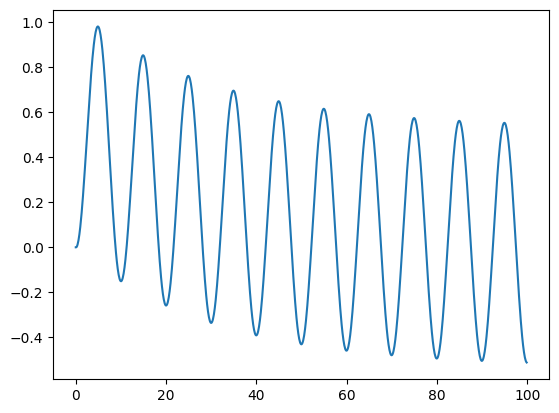

In [12]:
start_scope()

tau = 30*ms
tau_t = 50*ms # 입력 신호의 시간 상수 
f = 100*Hz # 입력 신호의 주파수 

# eqs: 뉴런 동작
eqs = '''
dv/dt = (10*sin(2*pi*f*t)-v)/tau : 1
'''
G = NeuronGroup(1, eqs, # number of unit and equation
                threshold='v>1', # fire spike 
                reset='v=0',
                method='euler')

M = StateMonitor(G, 'v', record=True)
run(100*ms)
plot(M.t/ms, M.v[0])

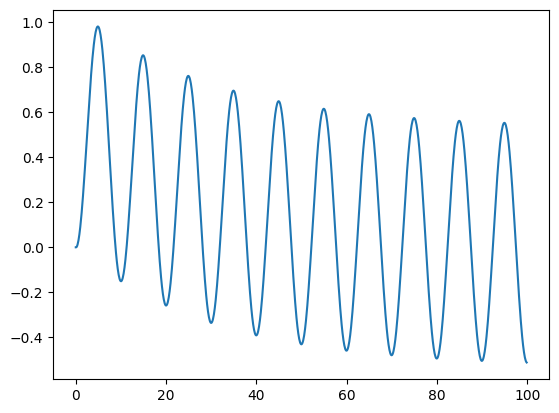

In [14]:
start_scope()

tau = 30*ms
tau_t = 50*ms # 입력 신호의 시간 상수 
f = 100*Hz # 입력 신호의 주파수 

# eqs: 뉴런 동작
eqs = '''
dv/dt = (10*sin(2*pi*f*t)-v)/tau : 1
'''
G = NeuronGroup(1, eqs, # number of unit and equation
                threshold='v>1', # fire spike 
                reset='v=-rand()',
                method='euler')

M = StateMonitor(G, 'v', record=True)
run(100*ms)
plot(M.t/ms, M.v[0])

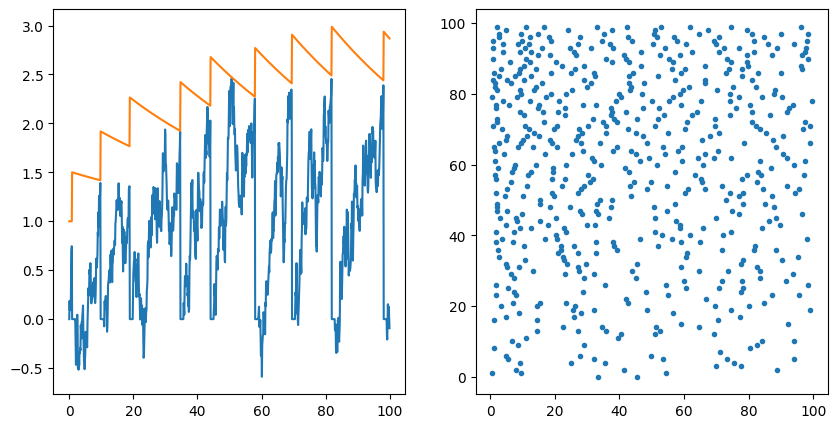

In [7]:
start_scope()

tau = 10*ms
tau_t = 50*ms
f = 100*Hz
eqs = '''
dv/dt = (I-v)/tau + 1.5*xi*tau**-0.5 : 1 (unless refractory)
dvt/dt = (1-vt)/tau_t : 1
I : 1
'''

# : for 1 define unit (어떤 유닛으로부터 왔는지)
G = NeuronGroup(100, eqs, # number of unit and equation
                threshold='v>vt', # fire spike 
                reset='v=0; vt += 0.5',
                refractory=1*ms,
                method='euler')
G.vt = 1 # initialize
G.v = 0
G.I = '3*i/(1.0*N)'

M = StateMonitor(G, ('v', 'vt'), record=[95])
spM = SpikeMonitor(G)
# brainplot(M): brain2tools 이용해 V와 tau에 대한 시각화를 할 수 있음 // plot(M.t/ms, M.v[0]) 와 동일 

net = Network(G, M, spM)
net.run(100*ms)

figure(figsize=(10,5))
subplot(121)
plot(M.t/ms, M.v[:].T)
plot(M.t/ms, M.vt[:].T)
subplot(122)
#brian_plot(spM)
plot(spM.t/ms, spM.i, '.')

In [3]:
#print(spM.t)
#print(spM.i)
print(spM.t[5], spM.i[5])

1. ms 31


In [4]:
start_scope()

eqs = '''
dv/dt = (I-v)/(10*ms) : 1
I : 1
'''

G = NeuronGroup(2, eqs, threshold='v>1', reset='v=0', method='exact')
G.I = [1.5, 0]

S = Synapses(G, G, 'w : 1', on_pre='v += w')
S.connect(i=0, j=1)
S.w = 0.5
S.delay = 5*ms

M = StateMonitor(G, 'v', record=True)

run(100*ms)

brian_plot(M)

NameError: name 'brian_plot' is not defined

<AxesSubplot:xlabel='source neuron index', ylabel='target neuron index'>

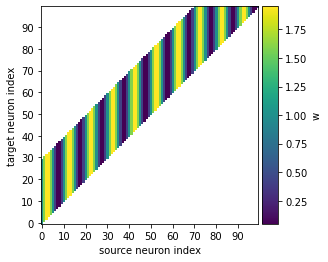

In [ ]:
start_scope()

eqs = '''
x : metre
'''

G = NeuronGroup(100, eqs)
G.x = '20*um*i'

S = Synapses(G, G, 'w : 1')
#S.connect(i=0, j=1)
#S.connect(condition='i!=j and abs(i-j)<30')
#S.connect(p=0.5)
#S.connect(condition='i!=j and abs(i-j)<30', p=0.5)
#S.connect(condition='i!=j', p='exp(-(i-j)**2/30.0**2)')
#S.connect(condition='i!=j', p='exp(-(x_pre-x_post)**2/(1000.0*um)**2)')
S.connect(j='k for k in range(i, i+30)', skip_if_invalid=True)

f = 1/(200*um)
S.w = '1+sin(2*pi*f*x_pre)'

brian_plot(S.w)

In [ ]:
w = zeros((100, 100))
w[S.i, S.j] = S.w

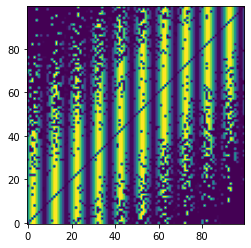

In [ ]:
imshow(w.T, origin='lower')

In [ ]:
# 영상 1시간 54분부터 실습
# https://www.youtube.com/watch?v=cAF3UWTzX9A

In [ ]:
i, j = w.nonzero()

In [ ]:
i

array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)

In [ ]:
j

array([ 1,  2,  3, ..., 96, 97, 98], dtype=int64)

In [ ]:
w[i, j]

array([1.        , 1.        , 1.        , ..., 0.41221475, 0.41221475,
       0.41221475])

In [ ]:
#S.connect(i=i, j=j)
#S.w = w[i, j]

In [ ]:
S.when, S.order

('start', 0)

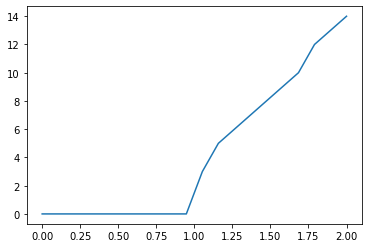

In [ ]:
start_scope()

I_values = linspace(0, 2, 20)
counts = []

tau = 10*ms
eqs = '''
dv/dt = (I-v)/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')
M = SpikeMonitor(G)

store()

for I in I_values:
    restore()
    run(100*ms)
    counts.append(M.num_spikes)

plot(I_values, counts)

WARNING    "I" is an internal variable of group "neurongroup_3", but also exists in the run namespace with the value 2.0. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


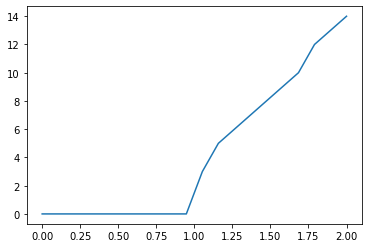

In [ ]:
start_scope()

I_values = linspace(0, 2, 20)
counts = []

tau = 10*ms
eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
'''
G = NeuronGroup(len(I_values), eqs, threshold='v>1', reset='v=0', method='exact')
G.I = I_values
M = SpikeMonitor(G)

run(100*ms)

plot(I_values, M.count)

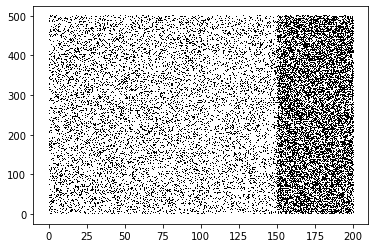

In [ ]:
start_scope()

# = PoissonGroup(100, rates=100*Hz)
eqs = '''
rates : Hz (shared)
'''
G = NeuronGroup(500, eqs, threshold='rand()<rates*dt')
M = SpikeMonitor(G)

# for _ in range(4):
#     G.rates = 'rand()*500*Hz'
#     run(50*ms)

#G.run_regularly('rates = rand()*500*Hz', dt=50*ms)

@network_operation(dt=50*ms)
def change_rates():
    G.rates = rand()*500*Hz

run(200*ms)

plot(M.t/ms, M.i, ',k')

In [ ]:
rand()*500*Hz

0.33884341 * khertz